<div style="text-align: center; font-weight: bold; font-size: 300%">Solution au Problème Posé</div>                                                        <br />      
<div style="text-align: center; font-size: 150%">octobre 2019</div><br />  
<div style="text-align: center; font-size: 120%">Jean-Charles Layoun</div>


In [1]:
import numpy.random as npr
from matplotlib import pyplot as plt

# Énoncé :

<i>À chaque instant "k", je ne peux garder en mémoire que l'un des k premiers messages passés. À l'instant N on arrête le processus et en mémoire doit se trouver l'un des N message, chaque message ayant la même probabilité d'être présent. </i>

***

# Proposition de résolution :

<br>
Soit $n\in \mathbb{N}^*$ et $i \in [\![1,n ]\!]$, on définit $S_{i}^{n}$ comme étant l'évènement le $i^{ème}$ message est stocké après avoir reçu $n$ messages. <br><br>
<b>Notre objectif </b> est donc d'avoir $\forall i \in [\![1,n ]\!]/\mathbb{P}(S_{i}^{n}) = \cfrac{1}{n}$, et pour cela on va prendre $\mathbb{P}(S_{n}^{n} / S_{i}^{n-1}) = \cfrac{1}{n}.$ <br><br>

Montrons par récurrence que $P_n $ : {les $S_{i}^{n}$ sont équiprobables avec $\forall (k,i) \in [\![2,n ]\!]\times[\![1,k-1 ]\!]; \mathbb{P}(S_{k}^{k} / S_{i}^{k-1}) = \cfrac{1}{k}$}, est vrai $\forall n\in \mathbb{N}^* $ : <br>
<ul>
<li>$P_1 : $ est vrai car $\mathbb{P}(S_{1}^{1}) = 1$.</li>
<li>
Supposons que $P_{n}$ est vrai et prenons $\mathbb{P}(S_{n+1}^{n+1} / S_{i}^{n}) = \cfrac{1}{n+1}$ :<br>    
<ol>
<li>$\mathbb{P}(S_{n+1}^{n+1}) = \sum_{i=1}^{n} \mathbb{P}(S_{n+1}^{n+1} \cap S_{i}^{n}) = \sum_{i=1}^{n} \mathbb{P}(S_{n+1}^{n+1} / S_{i}^{n}) \mathbb{P}(S_{i}^{n}) = \sum_{i=1}^{n}\cfrac{1}{n+1}\times \cfrac{1}{n} = \cfrac{1}{n+1}$</li><br>
<li>pour $i\in [\![1,n ]\!]$ on a $\mathbb{P}(S_{i}^{n+1}) = \mathbb{P}(S_{i}^{n} \cap \bar S_{n+1}^{n+1}) = \mathbb{P}(S_{i}^{n})\times \mathbb{P}( \bar S_{n+1}^{n+1}) = \cfrac{1}{n} \times \cfrac{n}{n+1} = \cfrac{1}{n+1}$</li>
</ol>
</li>
    <br>
On obtient donc que les $S_{i}^{n+1}$ sont équiprobables, $P_{n} \Rightarrow P_{n+1}.$
</ul>


$$CQFD$$

***

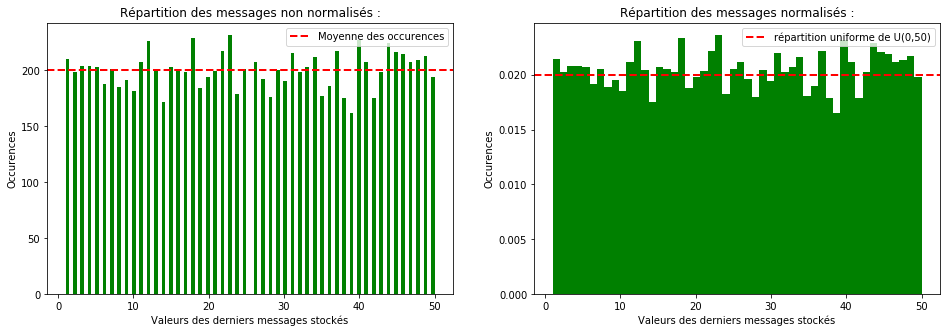

In [2]:
def Sol_F(N):
    Message = 1
    for i in range (2,N+1):
        if(npr.rand() < 1/i): Message = i 
    return Message

# Nombres de messages reçu
N = 50
# Nombres de tirages
n = 10000

## Test d'uniformité
def Test(N, n):
    if(N<=0 or n<1):
        print("No messages were received. Thus we return 0")
        return 0
    
    ## On répète n fois l'experience et on stock les résultats 
    l = []
    for i in range (0, n):
        l += [Sol_F(N)]
    
    
    ## Représentation des n tirages par histogramme
    fig, (ax1 , ax2) = plt.subplots(1, 2, figsize=(16, 5))


    ## La moyenne d'occurence par message = freq * nombre de tirages = 1/N * n
    ax1.hist(l, N*2, density=False, facecolor='g')
    ax1.axhline(y = 1/N*n, color='r', linestyle='dashed', linewidth=2, label=f"Moyenne des occurences")
    ax1.set_xlabel('Valeurs des derniers messages stockés')
    ax1.set_ylabel('Occurences')
    ax1.set_title(r'Répartition des messages non normalisés :')

    ax2.hist(l, N, density=True, facecolor='g')
    ax2.axhline(y = 1/N, color='r', linestyle='dashed', linewidth=2, label=f"répartition uniforme de U(0,{N})")
    ax2.set_xlabel('Valeurs des derniers messages stockés')
    ax2.set_ylabel('Occurences')
    ax2.set_title(r'Répartition des messages normalisés :')

    ax1.legend()
    ax2.legend()
    plt.show()


Test(N,n)